## Initialization

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

In [69]:
%matplotlib notebook
from pathlib import Path
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize

In [70]:
Categories=[]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir= r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset" #train data
img_size = 100

In [71]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files(datadir)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

In [8]:
for label in os.listdir(datadir):
    Categories.append(label)

print(Categories)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


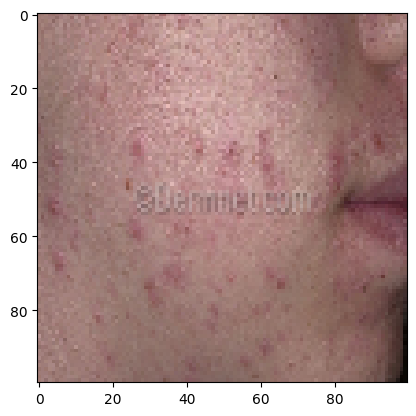

In [9]:
for category in Categories:
    path=os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array, (img_size, img_size))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        break
    break
plt.imshow(img_array)
plt.show()

In [10]:
import cv2
from pathlib import Path

datadir = r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset"
img_size = 32

training_data = []
Categories = []

p = Path(datadir)
dirs = [x for x in p.iterdir() if x.is_dir()]  # Only directories are considered

for folder_dir in dirs:
    label = folder_dir.name  # Assign the folder name as the label

    for img_path in folder_dir.glob("*.jpg"):
        try:
            img = cv2.imread(str(img_path))  # Read image with OpenCV
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (OpenCV reads BGR by default)
            img = cv2.resize(img, (img_size, img_size))  # Resize image
            training_data.append(img)  # Append the image to training_data
            Categories.append(label)  # Append the label to labels array
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Now 'training_data' contains the images and 'labels' contains the corresponding labels for each image.


In [11]:
print('[INFO] Images :', len(training_data))
print('[INFO] Label :', len(Categories))

[INFO] Images : 19289
[INFO] Label : 19289


In [12]:
lenofimage = len(training_data)

In [13]:
## Convert data into numpy array

image_data = np.array(training_data, dtype='object')/255.0
labels = np.array(Categories)

print(image_data.shape, labels.shape)

(19289, 32, 32, 3) (19289,)


In [14]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [15]:
## Data conversion for One vs One classification

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(19289, 3072)
(19289,)


In [50]:
number_of_classes = len(np.unique(labels))
print(number_of_classes)

24


In [56]:
def classWiseData(x, y):
    data = {}

    # Populate data dictionary
    for i in range(len(x)):
        label = y[i].replace(" ", "_")  # Replace spaces with underscores in the label
        if label not in data:
            data[label] = []
        data[label].append(x[i])

    # Convert lists to numpy arrays
    for k in data.keys():
        data[k] = np.array(data[k])

    return data

# Example usage:
# Assuming you have your image data in 'image_data' and labels in 'labels'
data_dict = classWiseData(image_data, labels)

In [48]:
"""Combines data of two classes into a single matrix"""
def getDataPairForSVM(d1,d2):
    
    l1,l2 = d1.shape[0], d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair, data_labels

In [49]:
data = classWiseData(image_data, labels)

KeyError: 'Acne_and_Rosacea_Photos'

In [57]:
print(data_dict[0].shape[0])
print(data[1].shape)
print(data[2].shape[0])
print(data[3].shape[0])

KeyError: 0

In [21]:
"""Combines data of two classes into a single matrix"""
def getDataPairForSVM(d1,d2):
    
    l1,l2 = d1.shape[0], d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair, data_labels

In [98]:
mySVM = SVM()
xp, yp = getDataPairForSVM(data[0], data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
plt.plot(loss)

IndexError: tuple index out of range